# Question 1

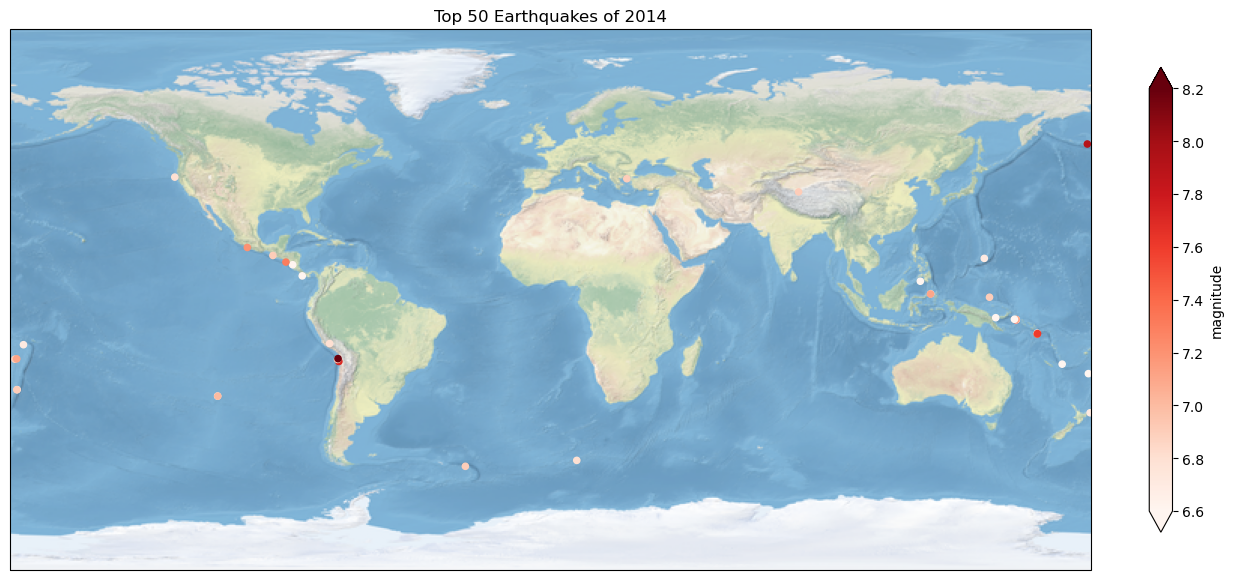

In [33]:

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("E:/桌面/usgs_earthquakes.csv")
data=data[['latitude','longitude','mag']]
data=data[(data['mag']>=6.6)]
plt.figure(figsize=(15,7.5), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.scatter(data['longitude'],data['latitude'], c=data["mag"],s=20,cmap="Reds")
plt.colorbar( extend='both', label='magnitude',fraction=0.02)
plt.title('Top 50 Earthquakes of 2014')
plt.show()

# Question 2

In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
ds = xr.open_dataset("CESM2_200001-201412.nc", engine="netcdf4")

D:\anaconda\lib\site-packages\xarray\conventions.py:512: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


D:\anaconda\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\anaconda\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\anaconda\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
D:\anaconda\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will

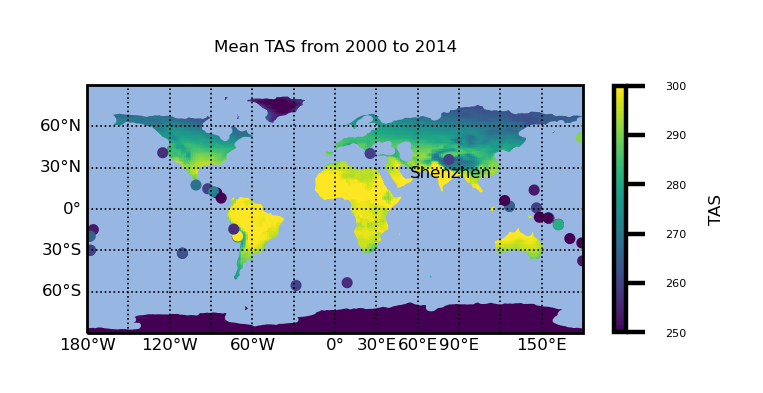

In [69]:
#Question 2.1
import matplotlib.pyplot as plt                                          
import cartopy.crs as ccrs                                               
import cartopy.feature as cf
import numpy as np
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
plt.figure(figsize=(2,2),dpi=400)
proj=ccrs.PlateCarree()
ax = plt.axes(projection=proj)
gl=ax.gridlines(draw_labels=True,linestyle=":",linewidth=0.3,color='k')
gl.top_labels=False #关闭上部经纬标签                                  
gl.right_labels=False
gl.xformatter = LONGITUDE_FORMATTER  #使横坐标转化为经纬度格式            
gl.yformatter = LATITUDE_FORMATTER                                        
gl.xlocator=mticker.FixedLocator(np.arange(-180,180,30))      
gl.ylocator=mticker.FixedLocator(np.arange(-90,90,30)) 
gl.xlabel_style={'size':3}#修改经纬度字体大小                             
gl.ylabel_style={'size':3}
ax.spines['geo'].set_linewidth(0.5)#调节边框粗细
ax0=ds.tas.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=250, vmax=300, add_colorbar=False)
ax.add_feature(cfeature.OCEAN, zorder=1)#添加掩膜 或者 说是 海洋的图层
plt.title("Mean TAS from 2000 to 2014",fontsize=3)
plt.scatter(data['longitude'],data['latitude'], c=data["mag"],s=1)#第一题中的地震点
sz_lon, sz_lat = 114, 22.5
plt.text(sz_lon , sz_lat, 'Shenzhen',
         horizontalalignment='right',
         transform=ccrs.Geodetic(),fontsize=3)#在地图上添加了shenzhen这个点
font={'size':3}
cb = plt.colorbar( ax0,shrink=0.4)
cb.set_label('TAS',fontdict=font)
plt.rcParams['font.size'] = 2####重设colorbar字体和样式

D:\anaconda\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\anaconda\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\anaconda\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
D:\anaconda\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will

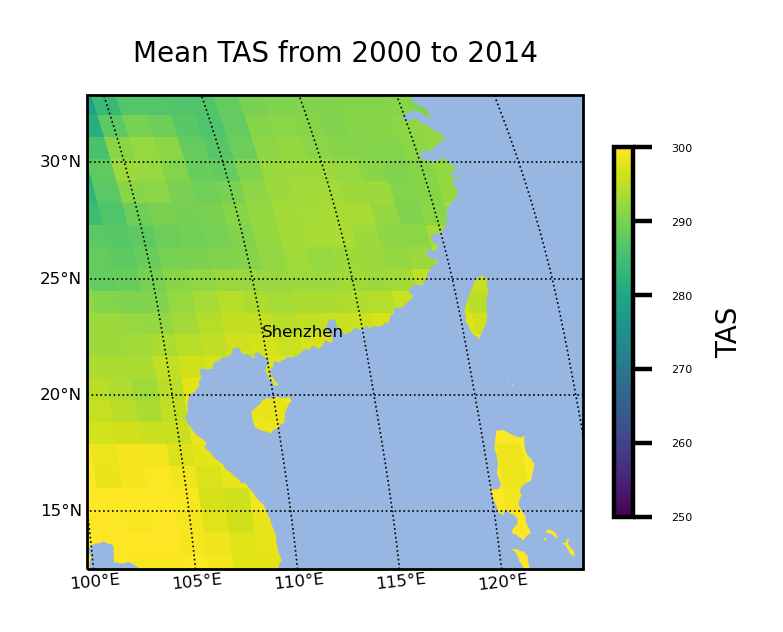

In [68]:
#Q2.2
plt.figure(figsize=(2,2),dpi=400)
proj=ccrs.Robinson()#改用robinson投影
ax = plt.axes(projection=proj)
gl=ax.gridlines(draw_labels=True,linestyle=":",linewidth=0.3,color='k')
gl.top_labels=False #关闭上部经纬标签                                  
gl.right_labels=False
gl.xformatter = LONGITUDE_FORMATTER  #使横坐标转化为经纬度格式            
gl.yformatter = LATITUDE_FORMATTER                                        
gl.xlocator=mticker.FixedLocator(np.arange(-180,180,5))      
gl.ylocator=mticker.FixedLocator(np.arange(-90,90,5)) 
gl.xlabel_style={'size':3}#修改经纬度字体大小                             
gl.ylabel_style={'size':3}
ax.spines['geo'].set_linewidth(0.5)#调节边框粗细
ax0=ds.tas.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=250, vmax=300,add_colorbar=False)
ax.add_feature(cfeature.OCEAN, zorder=1)#添加掩膜 或者 说是 海洋的图层
plt.title("Mean TAS from 2000 to 2014",fontsize=5)
sz_lon, sz_lat = 114, 22.5
plt.text(sz_lon , sz_lat, 'Shenzhen',
         horizontalalignment='right',
         transform=ccrs.Geodetic(),fontsize=3)#在地图上添加了shenzhen这个text
extent = [sz_lon-10, sz_lon+10, sz_lat-10, sz_lat+10]#设置地图范围
ax.set_extent(extent)
font={'size':5}
cb = plt.colorbar( ax0,shrink=0.6)
cb.set_label('TAS',fontdict=font)
plt.rcParams['font.size'] = 2####重设colorbar字体和样式